<a href="https://colab.research.google.com/github/raviakasapu/DeepLearningPyTorch/blob/main/Seven_Lions_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Seven Lions Exercise

In this exercise, you will practice implementing data augmentation techniques on a sample image of a lion. In addition to the original image, you will generate six lions using augmentation. 

We've written the exercise for PyTorch, but you're welcome to use any alternative library for image augmentation you could use. In fact, YOLOv5 uses [Albumentation](https://albumentations.ai/). Refer to this [PyTorch page](https://pytorch.org/vision/main/transforms.html) for more information on PyTorch's data augmentation techniques.

In [1]:
#Import libraries

from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as T

In [12]:
import torchvision
import cv2
from google.colab.patches import cv2_imshow

In [26]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

In [2]:
#Set parameters

plt.rcParams["savefig.bbox"] = 'tight'
torch.manual_seed(0) #for randomly applied transforms

##Lion #1

In [10]:
image_path = "lion.jpg"

In [28]:
orig_img = Image.open(image_path)

In [ ]:
#Display original image
##Note: Upload the image of the lion to the Session Storage (under Files). You may need to adjust the path.
#Hint: Use .show() to display the image 


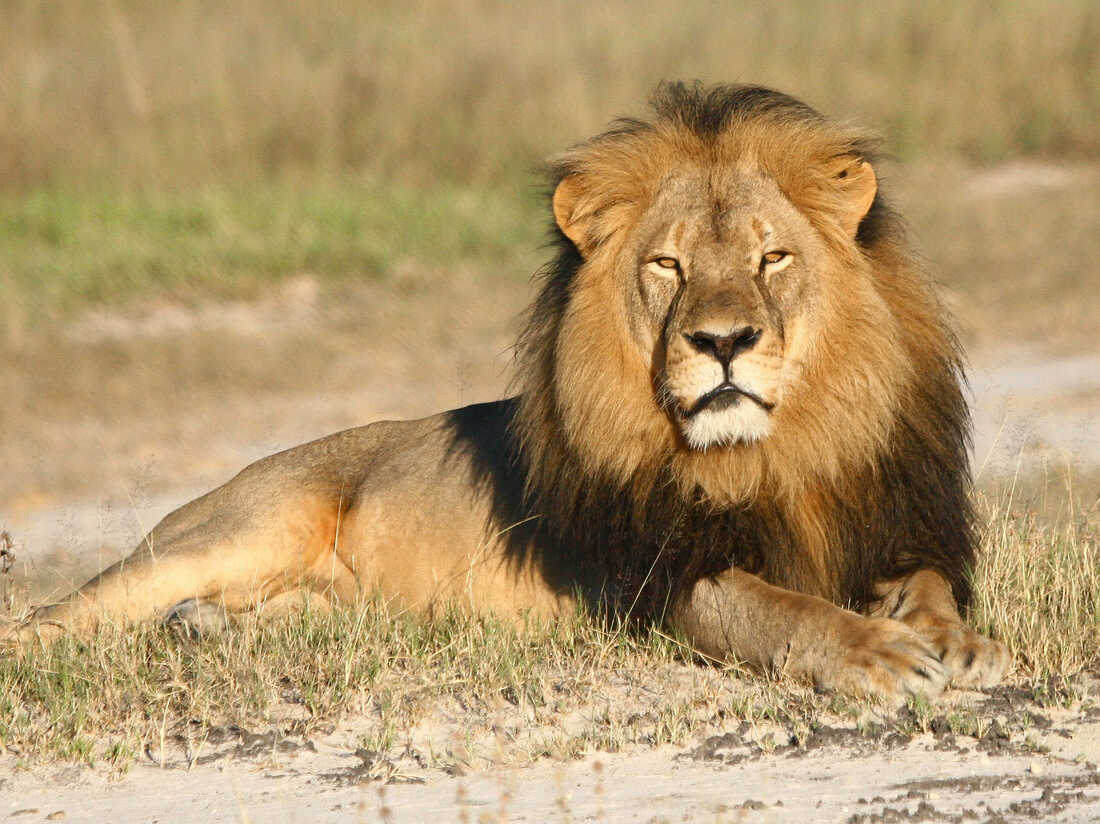

In [14]:

img = cv2.imread(image_path)
cv2_imshow(img)


In [18]:
img2 = Image.open(image_path)

##Lion #2

In [19]:
#Display the shape of the image
##Hint: Convert the image to an array using the np.asarray() method
image_np_array = np.asarray(img2)

In [20]:
image_np_array.shape

(824, 1100, 3)

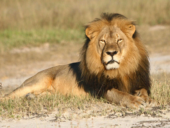

In [21]:
#Resize the original image to be 128 x 128 
##Hint: Use the Resize transform
torchvision.transforms.Resize(128)(img2)

##Lion #3

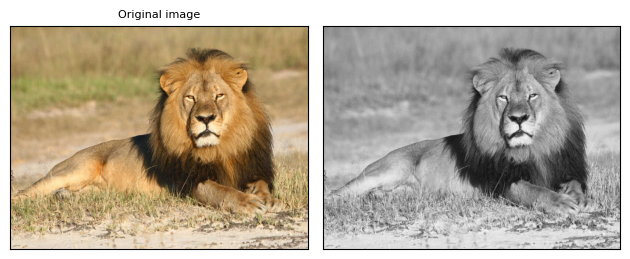

In [29]:
#Grayscale the original image
##Hint: Use the Grayscale transform
gray_img = T.Grayscale()(img2)
plot([gray_img], cmap='gray')

##Lion #4

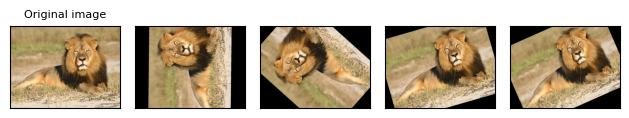

In [30]:
#Rotate the original image
##Hint: Use the RandomRotation transform
rotater = T.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

##Lion #5

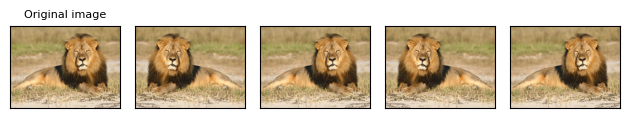

In [31]:
#Reflect (flip) the original image
##Hint: Use the RandomHorizontalFlip transform
hflipper = T.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

##Lion #6

In [ ]:
#Normalize the original image
##Hint: Use the Normalize transform
##Hint: You'll need to convert the image to a Tensor image (and then convert back to a PIL image to display)
##Note: PyTorch uses the means and standard deviations of ImageNet in its documentation


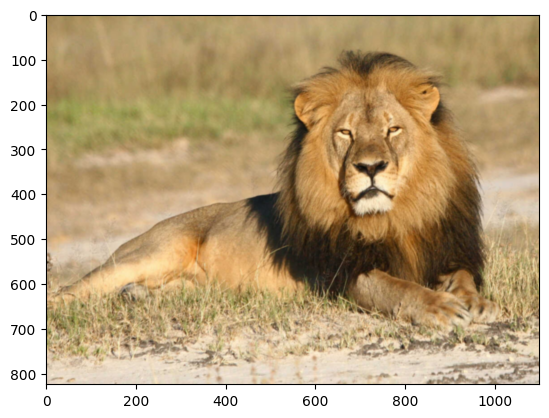

In [33]:
image = Image.open(image_path)
plt.imshow(T.ToPILImage()(T.ToTensor()(image)), interpolation="bicubic")

In [ ]:
lion_torch_image = torchvision.io.read_image(image_path)


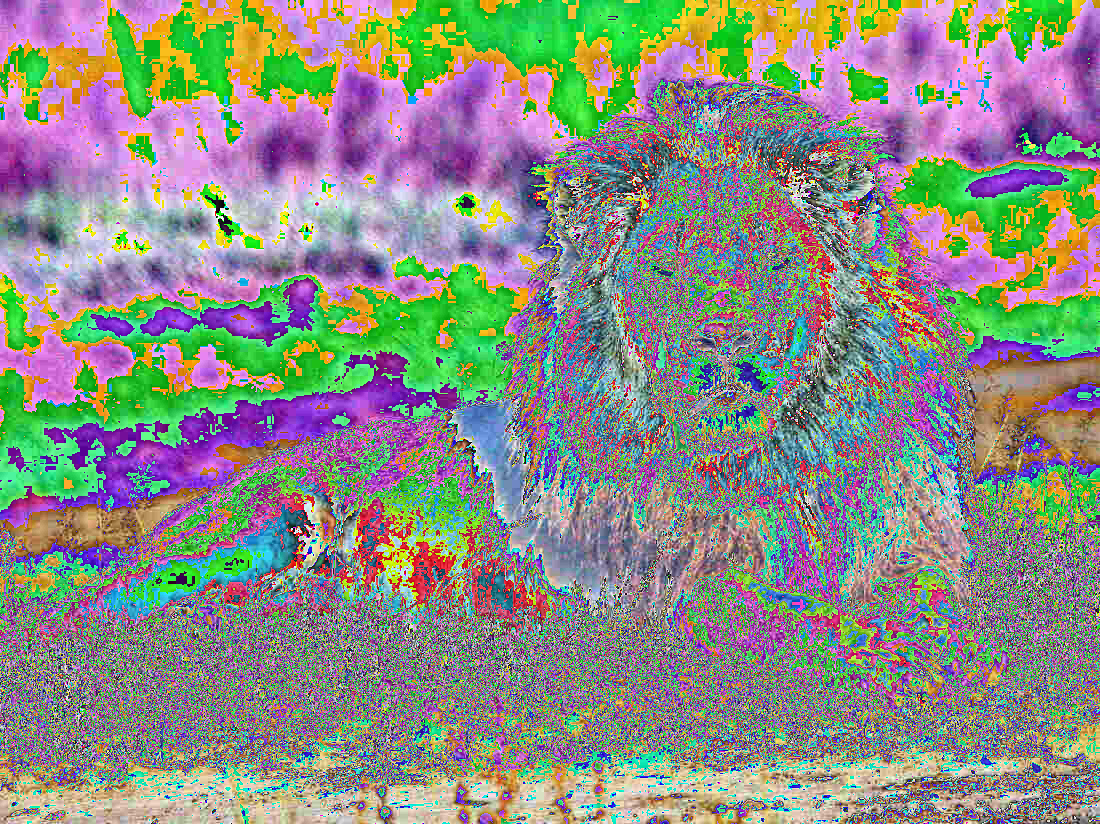

In [36]:
norm_img = T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))(T.ToTensor()(image))
norm_img = T.ToPILImage()(norm_img)
norm_img.show()

##Lion #7

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


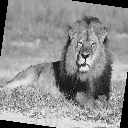

In [37]:
#Create a pipeline of 3 transformations of your choosing and display your final image
##Hint: Use torch.nn.Sequential class

transforms = torch.nn.Sequential(
    T.Resize(size=(128, 128)),
    T.RandomRotation(90),
    T.Grayscale(),
)

multi_img = transforms(T.ToTensor()(orig_img))
T.ToPILImage()(multi_img)